In [44]:
import numpy as np
import matplotlib.pyplot as plt
from pimcscripts import pimchelp
from dgutils import colors as colortools
#from dgutils import savehtml

%matplotlib inline
%config InlineBackend.figure_format= 'svg'
plt.style.use('classic')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [45]:
sim_params = {'N':2, 'n':0.2, 'τ':0.005}
Tmax = 50

In [46]:
def Exact_SHO(pNum, temp):
    return pNum / (np.exp(pNum / temp) - 1.0)

In [47]:
def High_Temp_App(pNum, temp):
    return temp / ( 1.0 + pNum/(2.0 * temp) )

In [48]:
tmax = Tmax
N = sim_params['N']

E_f = N*N/2.0 * np.ones(100*tmax)
E_b = N/2.0 * np.ones(100*tmax)
E_fhT = np.copy(E_f)
E_flT = np.copy(E_f)
E_bhT = np.copy(E_b)
E_blT = np.copy(E_b)

temp = np.linspace(0.0001, tmax, 100*tmax)
for t in range(len(temp)):
    for k in range(1,N+1):
        exact = k / (np.exp(k / temp[t]) - 1.0)  #Exact_SHO(k, temp[t])
        
        E_f[t] += exact #k / (np.exp(k / temp[t]) - 1.0)
        E_b[t] += exact #k / (np.exp(k / temp[t]) - 1.0)

    hTemp = N * temp[t] #temp[t] / ( 1.0 + k/(2.0 * temp[t]) )  #High_Temp_App(k, temp[t])
    lTemp = np.exp(-1.0 / temp[t]) + np.exp(-2.0 / temp[t])
    E_fhT[t] += hTemp   #1.0 / (1.0/temp[t] * (1.0 + k/(2.0 * temp[t])))
    E_bhT[t] += hTemp   #1.0 / (1.0/temp[t] * (1.0 + k/(2.0 * temp[t])))
    E_flT[t] += lTemp   #1.0 / (np.exp(1.0 / temp[t]) - 1)
    E_blT[t] += lTemp   #1.0 / (np.exp(1.0 / temp[t]) - 1)


/tmp/ipykernel_20055/750270474.py:14: RuntimeWarning: overflow encountered in exp
  exact = k / (np.exp(k / temp[t]) - 1.0)  #Exact_SHO(k, temp[t])


In [49]:
def Plot_Fermion(temp, E_f, E_fhT, E_flT, plot_high=False, plot_low=False):
    plt.plot(temp, E_f, 'r', label=f"Fermion <E>, N = {sim_params['N']}")
    plt.plot(0, N*N/2, 'r,')
    
    if plot_high:
        plt.fill_between(temp, E_fhT, E_f, alpha=0.33)
    if plot_low:
        plt.fill_between(temp, E_flT, E_f, alpha=0.5)
    plt.axvline(2.0, color='red', marker="|", linestyle="dashed")

In [50]:
def Plot_Boson(temp, E_b, E_bhT, E_blT, plot_high=False, plot_low=False):
    plt.plot(temp, E_b, 'b', label=f"Boson <E>, N = {sim_params['N']}")
    plt.plot(0, N/2, 'b,')
    if plot_high:
        plt.fill_between(temp, E_bhT, E_b, alpha=0.33)
    if plot_low:
        plt.fill_between(temp, E_blT, E_b, alpha=0.5)
    plt.axvline(12.57, color='blue', marker="|", linestyle="dashed")

In [51]:
root_dir = './JULIA/test/code_data/' + str(sim_params['τ'])
data_dir = root_dir + '/data/'
plot_dir = root_dir + '/plot/'
#print(data_dir)
!reduce-one.py -r T -N {sim_params['N']} -s 0.2 -n {sim_params['n']} -t {sim_params['τ']} --canonical {data_dir}

Reduced estimator over 22 Temperature value(s).
Reduced lineardensity over 22 Temperature value(s).


In [52]:
est_reduce_name = pimchelp.get_reduce_name(**sim_params,canonical=True,reduce='T', estimator='estimator')
estimator = pimchelp.PIMCResults(f'{data_dir}{est_reduce_name}')
rho_reduce_name = pimchelp.get_reduce_name(**sim_params,canonical=True,reduce='T',estimator='lineardensity')
rho = pimchelp.PIMCResults(f'{data_dir}{rho_reduce_name}')

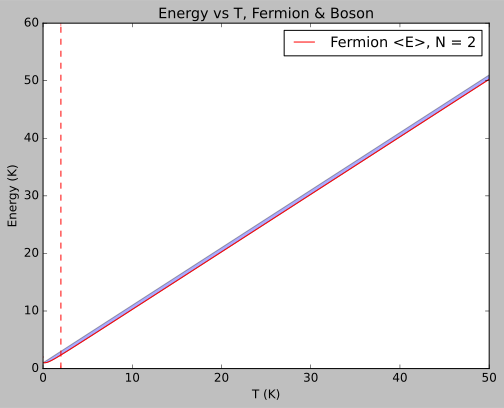

In [55]:
params = {'mfc':'None', 'elinewidth':0.5, 'marker':'o', 'ms':5, 'lw':0.75, 'ls':'None', 'mew':0.75, 'mec':colors[0]}

#Plot_Boson(temp, E_b, E_bhT, E_blT, False, False)
Plot_Fermion(temp, E_f/sim_params['N'], E_fhT/sim_params['N'], E_flT/sim_params['N'], True, False)

T = estimator.data['T']
#plt.errorbar(T, estimator.data['E']/sim_params['N'], yerr=estimator.data['ΔE'], **params, label=f"QMC $N={sim_params['N']},\ Δτ={sim_params['τ']}$")

plt.xlabel("T (K)")
plt.ylabel("Energy (K)")
plt.title("Energy vs T, Fermion & Boson")
plt.legend()